**Artificial Neural Network (ANN) from scratch** 

In [30]:
import sklearn.datasets
import numpy as np

def load_data(N=500, n_features=2):
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=n_features, n_classes=2, shuffle=True, random_state=None)
    return gq

def load_test_train_data(num_test_samples=100, N=500, n_features=2):
    samples, outputs = load_data(N, n_features)
    return samples[num_test_samples:,:], outputs[num_test_samples:], samples[:num_test_samples,:], outputs[:num_test_samples]

In [31]:
class NN:
    
    def __init__(self, samples, output, initialize="uniform", init_val1=-0.05, init_val2=0.05, n_hidden=8, n_out=1):
        self.N = samples.shape[0]
        self.n_features = samples.shape[1]
        self.n_hidden = n_hidden
        self.n_out = n_out
        self.init_val1 = init_val1
        self.init_val2 = init_val2
        self.init_network(initialize)
        
    def init_network(self, initialize):
        if initialize == "normal":
            self.weights1 = self.init_weights_normal(self.n_features, self.n_hidden)
            self.weights2 = self.init_weights_normal(self.n_hidden, self.n_out)
        else:
            self.weights1 = self.init_weights_uniform(self.n_features, self.n_hidden)
            self.weights2 = self.init_weights_uniform(self.n_hidden, self.n_out)

        self.bias1 = np.ones(self.n_hidden)
        self.bias2 = np.ones(self.n_out)

    def init_weights_normal(self, dim1, dim2):
        return np.random.normal(loc=float(self.init_val1), scale=float(self.init_val2), size=(dim1, dim2))

    def init_weights_uniform(self, dim1, dim2):
        return np.random.uniform(low=float(self.init_val1), high=float(self.init_val1), size=(dim1, dim2))

    def sigmoid(self, value):
        return (1 / (1 + np.exp(-value)))

    def sigmoid_prime(self, value):
        return value * (1 - value)

    def relu(self, value):
        return value * (value > 0)

    def relu_prime(self, value):
        return 1. * (value > 0)

    def loss_function(self, out_hat, output):
        return (1/len(out_hat)) * np.sum((output - out_hat)**2)

    def accuracy_function(self, out_hat, output):
        predicted = np.where(out_hat < 0.5, 0, 1)
        truevalues = output == predicted

        return np.sum(truevalues) / len(out_hat)
    
    def forward_pass(self, samples):
        self.u1 = np.dot(samples, self.weights1)
        self.a1 = self.relu(self.u1 + self.bias1)
        self.u2 = np.dot(self.a1, self.weights2)
        self.a2 = np.squeeze(self.sigmoid(self.u2 + self.bias2))

        return self.a2
    
    def backward_pass(self, sample, output, learning_rate=0.05):
        out_hat = self.forward_pass(sample)
        
        gradient2 = 2 * (out_hat - output) * self.sigmoid_prime(out_hat)
        delta_w2 = np.dot(gradient2, self.a1)
        delta_w2.shape = (self.n_hidden, 1)
        
        gradient1 = np.squeeze(gradient2 * self.weights2)
        gradient1 = np.multiply(gradient1, self.relu_prime(self.a1))
        delta_w1 = np.outer(sample, gradient1)

        self.weights1 = self.weights1 - learning_rate * delta_w1
        self.weights2 = self.weights2 - learning_rate * delta_w2

    
    def train(self, samples, outputs, test_samples, test_outputs, epochs=100, learning_rate=0.05):
        errors = np.array([])
        accuracies = np.array([])
        test_errors = np.array([])
        test_accuracies = np.array([])
        
        for idx in range(epochs):
            out_hats = self.forward_pass(samples)
            errors = np.append(errors, self.loss_function(out_hats, outputs))
            accuracies = np.append(accuracies, self.accuracy_function(out_hats, outputs))
            test_out_hats = self.forward_pass(test_samples)
            test_errors = np.append(test_errors, self.loss_function(test_out_hats, test_outputs))
            test_accuracies = np.append(test_accuracies, self.accuracy_function(test_out_hats, test_outputs))

            for idx2 in range(self.N):
                randIdx = np.random.randint(self.N)
                self.backward_pass(samples[randIdx], outputs[randIdx], learning_rate)
                
        return errors, accuracies, test_errors, test_accuracies

In [41]:
samples, output, test_samples, test_output = load_test_train_data()


initialize_settings = np.array([
    ["uniform", 0, 1],                                
    ["uniform", -1, 1],                                
    ["uniform", -0.1, 0.1],                                
    ["uniform", 0, 1],                                
    ["uniform", -0.05, 0.05],    
    ["normal", 0, 1],                                
    ["normal", 0, 0.5],                                
    ["normal", 1, 1],                                
    ["normal", -1, 1],                                
    ["normal", 0.5, 1],                                
])

mean_error = np.array([])
mean_accuracy = np.array([])
mean_error_test = np.array([])
mean_accuracy_test = np.array([])

for settings in initialize_settings:
    nn = NN(samples, output, initialize=settings[0], init_val1=settings[1], init_val2=settings[2])

    errors, accuracies, test_errors, test_accuracies = nn.train(
            samples,
            output,
            test_samples,
            test_output
        )

    mean_error = np.append(mean_error, np.mean(errors))
    mean_accuracy = np.append(mean_accuracy, np.mean(accuracies))
    mean_error_test = np.append(mean_error_test, np.mean(test_errors))
    mean_accuracy_test = np.append(mean_accuracy_test, np.mean(test_accuracies))


print("--- Training set error and standard deviation ---")
print("Error: ", np.mean(mean_error))
print("Standard deviation: ", np.std(mean_error))
print("\n")
print("--- Training set accuracy and standard deviation ---")
print("Accuracy: ", np.mean(mean_accuracy))
print("Standard deviation: ", np.std(mean_accuracy))
print("\n")
print("--- Test set error and standard deviation ---")
print("Error: ", np.mean(mean_error_test))
print("Standard deviation: ", np.std(mean_error_test))
print("\n")
print("--- Test set accuracy and standard deviation ---")
print("Accuracy: ", np.mean(mean_accuracy_test))
print("Standard deviation: ", np.std(mean_accuracy_test))


--- Training set error and standard deviation ---
Error:  0.16959660039261087
Standard deviation:  0.09404587638563398


--- Training set accuracy and standard deviation ---
Accuracy:  0.7083575
Standard deviation:  0.1964658345139175


--- Test set error and standard deviation ---
Error:  0.17949885289639006
Standard deviation:  0.08959293411716379


--- Test set accuracy and standard deviation ---
Accuracy:  0.6793199999999999
Standard deviation:  0.20075935245960522


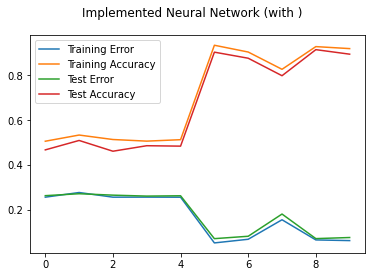

In [42]:
import matplotlib.pyplot as plt

plt.suptitle('Implemented Neural Network (with )')
plt.plot(mean_error)
plt.plot(mean_accuracy)

plt.plot(mean_error_test)
plt.plot(mean_accuracy_test)
plt.legend(['Training Error', 'Training Accuracy', 'Test Error', 'Test Accuracy'])
plt.show()


**Keras Neural Network**

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt


initializer = tf.keras.initializers.RandomUniform(
    minval=-1, maxval=1, seed=None
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, input_dim=2, activation='relu', use_bias=True, bias_initializer='ones', kernel_initializer=initializer),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True, bias_initializer='ones', kernel_initializer=initializer)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss='mean_squared_error', metrics='accuracy')

samples, outputs, test_samples, test_outputs = load_test_train_data()

history = model.fit(samples, outputs, epochs=100, batch_size=1, validation_data=(test_samples, test_outputs), validation_freq=1)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.4950 - val_loss: 0.2294 - val_accuracy: 0.6100
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.2122 - accuracy: 0.6925 - val_loss: 0.1901 - val_accuracy: 0.7500
Epoch 3/100
400/400 [==============================] - 1s 1ms/step - loss: 0.1742 - accuracy: 0.7700 - val_loss: 0.1543 - val_accuracy: 0.8200
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.1295 - accuracy: 0.8450 - val_loss: 0.1195 - val_accuracy: 0.8700
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9250 - val_loss: 0.0837 - val_accuracy: 0.9200
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9300 - val_loss: 0.0614 - val_accuracy: 0.9800
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9475 - val_loss: 0.0549 - val_accuracy: 0.9600

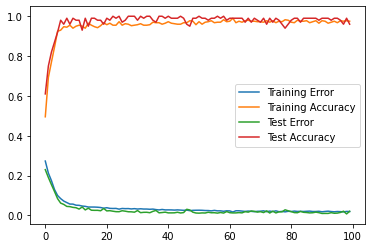

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Error', 'Training Accuracy', 'Test Error', 'Test Accuracy'])

plt.show()